In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("NFLX.csv")

In [62]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [63]:
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [64]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [65]:
df = df[['Open', 'High', 'Low', 'Close']]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1009 non-null   float64
 1   High    1009 non-null   float64
 2   Low     1009 non-null   float64
 3   Close   1009 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


In [67]:
df = df.round(1)

In [68]:

# df["Close/Last"] = df["Close/Last"].applY(lambda x: str(x).split("$")[1] ).astYpe(float)
# df["Open"] = df["Open"].applY(lambda x: str(x).split("$")[1] ).astYpe(float)
# df["High"] = df["High"].applY(lambda x: str(x).split("$")[1] ).astYpe(float)
# df["Low"] = df["Low"].applY(lambda x: str(x).split("$")[1] ).astYpe(float)

In [69]:
df

,Open,High,Low,Close
0,262.0,267.9,250.0,254.3
1,247.7,266.7,245.0,265.7
2,266.6,272.5,264.3,264.6
3,267.1,267.6,250.0,250.1
4,253.9,255.8,236.1,249.5
...,...,...,...,...
1004,402.0,427.7,398.2,427.1
1005,433.0,458.5,425.5,457.1
1006,448.2,452.0,426.5,429.5
1007,421.4,429.3,404.3,405.6


In [70]:
# sns.histplot(df["High"])

<Axes: >

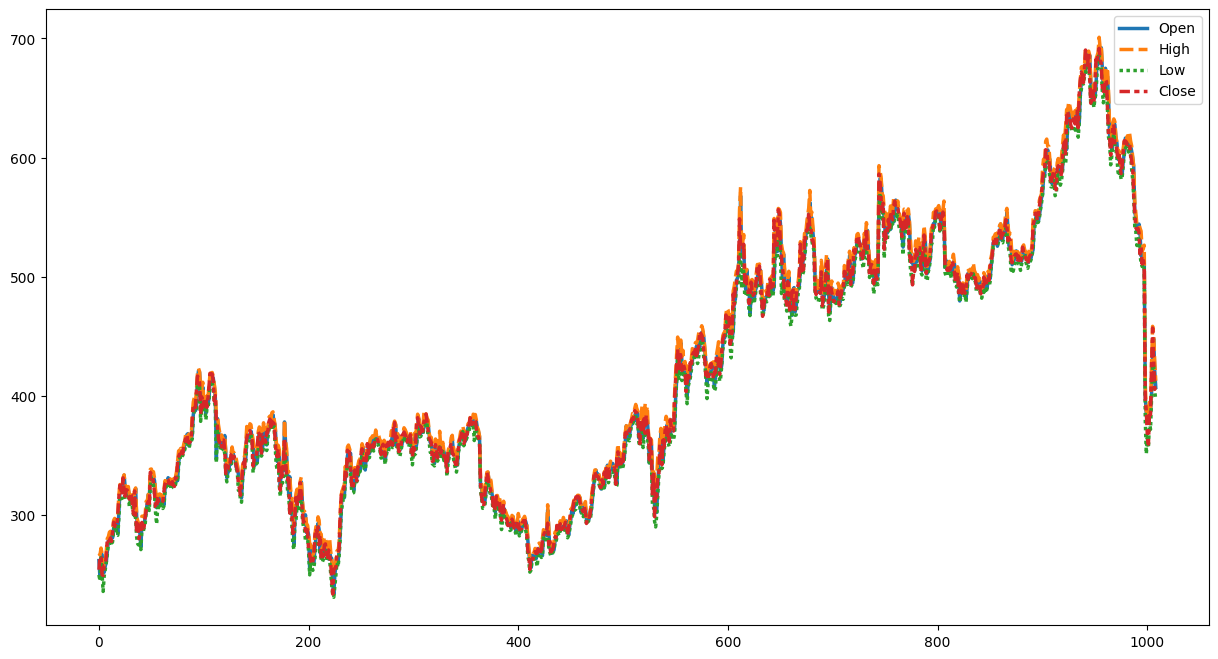

In [71]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, palette="tab10", linewidth=2.5)

In [72]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.998604,0.998508,0.996812
High,0.998604,1.000000,0.998203,0.998551
Low,0.998508,0.998203,1.000000,0.998544
Close,0.996812,0.998551,0.998544,1.000000


<Axes: >

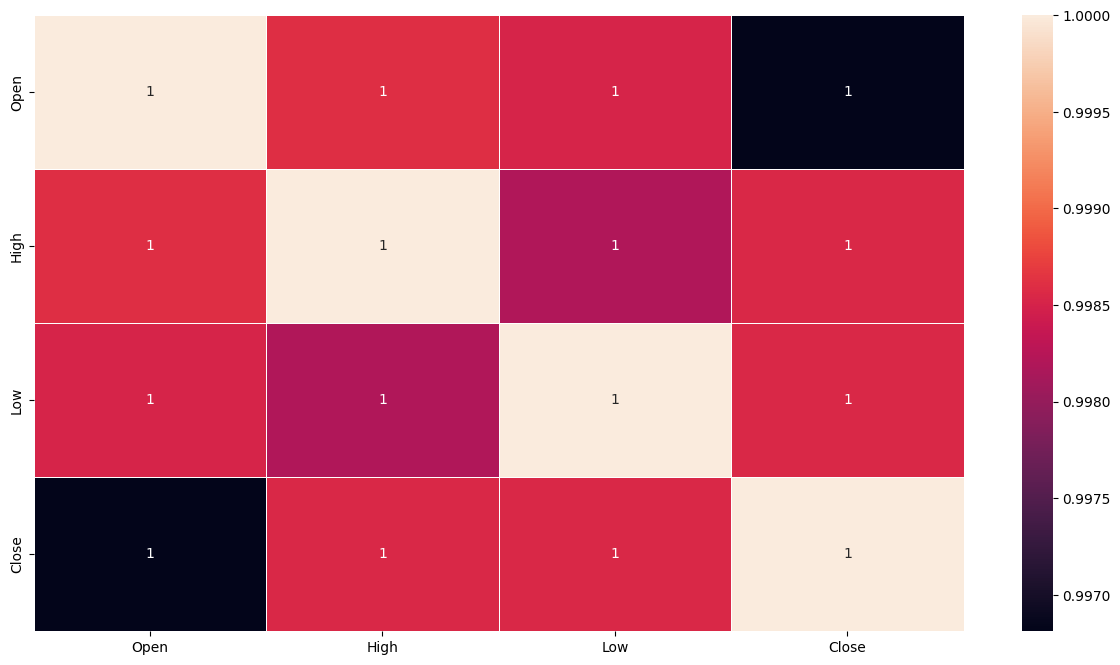

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [74]:
df.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [75]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# df["Open"] = le.fit_transform(df["Open"])
# df["High"] = le.fit_transform(df["High"])
# df["Low"] = le.fit_transform(df["Low"])
# df["Close"] = le.fit_transform(df["Close"])

In [76]:
df

,Open,High,Low,Close
0,262.0,267.9,250.0,254.3
1,247.7,266.7,245.0,265.7
2,266.6,272.5,264.3,264.6
3,267.1,267.6,250.0,250.1
4,253.9,255.8,236.1,249.5
...,...,...,...,...
1004,402.0,427.7,398.2,427.1
1005,433.0,458.5,425.5,457.1
1006,448.2,452.0,426.5,429.5
1007,421.4,429.3,404.3,405.6


In [77]:
from imblearn.combine import SMOTETomek
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [78]:
# smo_tek = SMOTETomek()
# X_smotek, Y_smotek = smo_tek.fit_resample(X, Y)

In [79]:
# Y = df.iloc[:,-1]
# Y

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size=0.25, random_state=33)

In [81]:
X_train.shape

(756, 3)

In [82]:
Y_train

521    368.8
760    557.6
820    486.7
0      254.3
677    554.1
       ...  
658    483.9
578    429.3
728    514.0
391    295.0
20     325.2
Name: Close, Length: 756, dtype: float64

In [83]:
X_train

,Open,High,Low
521,381.0,393.5,367.4
760,564.4,565.9,554.2
820,502.0,503.1,486.1
0,262.0,267.9,250.0
677,540.6,557.7,537.2
...,...,...,...
658,500.0,504.7,483.3
578,437.0,439.1,427.2
728,515.1,519.3,512.2
391,295.2,297.0,292.5


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing

In [85]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=1000),
}

In [86]:
best_model = None
best_r2 = float('-inf')
results = []

for name, model in models.items():
    model.fit(X_train, Y_train)  # Train model
    Y_pred = model.predict(X_test)  # Predict on test data
    
    # Calculate metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    results.append({"Model": name, "MSE": mse, "MAE": mae, "R2 Score": r2})
    
    # Check for best R2 score
    if r2 > best_r2:
        best_r2 = r2
        best_model = name

# Convert results to DataFrame
df_results = pd.DataFrame(results).sort_values(by="MSE")
print("\nSorted Results:\n", df_results)

# Print Best Model
print(f"\n🏆 Best Model: {best_model} with R² Score = {best_r2:.4f}")


/home/jonah/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.168e+03, tolerance: 8.992e+02
  model = cd_fast.enet_coordinate_descent(



Sorted Results:
                        Model          MSE        MAE  R2 Score
1           Ridge Regression    19.161524   3.158544  0.998283
0          Linear Regression    19.161619   3.158503  0.998283
2           Lasso Regression    21.560674   3.375955  0.998068
8              MLP Regressor    23.264386   3.625188  0.997915
5              Random Forest    30.116597   3.906091  0.997301
7              KNN Regressor    31.752964   4.015810  0.997154
6          Gradient Boosting    32.259147   4.126693  0.997109
4              Decision Tree    42.436047   4.739130  0.996197
3  Support Vector Regression  1136.646497  15.531505  0.898138

🏆 Best Model: Ridge Regression with R² Score = 0.9983


In [87]:
model = Ridge()
model.fit(X_train,Y_train)
Y_pred_knn = model.predict(X_test)


In [88]:
import pickle
pickle.dump(models[best_model], open('model.pkl', 'wb'))

In [89]:
df

,Open,High,Low,Close
0,262.0,267.9,250.0,254.3
1,247.7,266.7,245.0,265.7
2,266.6,272.5,264.3,264.6
3,267.1,267.6,250.0,250.1
4,253.9,255.8,236.1,249.5
...,...,...,...,...
1004,402.0,427.7,398.2,427.1
1005,433.0,458.5,425.5,457.1
1006,448.2,452.0,426.5,429.5
1007,421.4,429.3,404.3,405.6


In [92]:
from sklearn.preprocessing import StandardScaler

# Example input (replace with real values)
new_data = np.array([[247.6, 266.7, 250.0]])  # Open, High, Low values

# Load the same scaler used for training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Refit on training data
new_data_scaled = scaler.transform(new_data)  # Scale new input

# Make prediction
predicted_close = model.predict(new_data_scaled)
print(f"📈 Predicted Close Price: {predicted_close[0]:.2f}")


📈 Predicted Close Price: -1.19


/home/jonah/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/jonah/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
